# Upper Confidence Bound

## importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


## Implement algorithm

In [3]:
import math
d = dataset.shape[1]
selected_number = [0] * d
reward_sum = [0] * d
ads_selected = []
full_reward = 0

for n in range(0, dataset.shape[0]):
    ad = 0
    max_u_b = 0
    for i in range(0,dataset.shape[1]):
        if selected_number[i] > 0: 
            avg_reward = reward_sum[i] / selected_number[i]
            delta_i = math.sqrt((3/2) * math.log(n+1) / selected_number[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_u_b:
            max_u_b = upper_bound
            ad = i
    ads_selected.append(ad)
    selected_number[ad] += 1
    reward = dataset.values[n, ad]
    reward_sum[ad] += reward
    full_reward += reward

In [4]:
print(full_reward)

2178


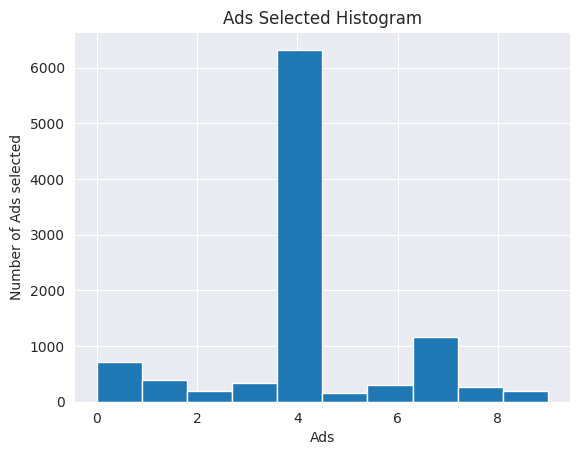

In [5]:
plt.hist(ads_selected)
plt.title("Ads Selected Histogram")
plt.xlabel("Ads")
plt.ylabel("Number of Ads selected")
plt.show()